In [86]:
from function.function import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from pandas.core import datetools

import warnings

warnings.filterwarnings('ignore')
get_ipython().magic('matplotlib inline')

## 1.EDA

### 1-1 데이터 소개

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print("Train data : ", train.shape)
print("Test  data : ", test.shape)

Train data :  (1460, 81)
Test  data :  (1459, 80)


In [4]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Find : 1. LotFrontage, MasVnrArea 등 일부 데이터가 missing되었음

### 1-2 타겟 데이터 (SalePrice)

In [7]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

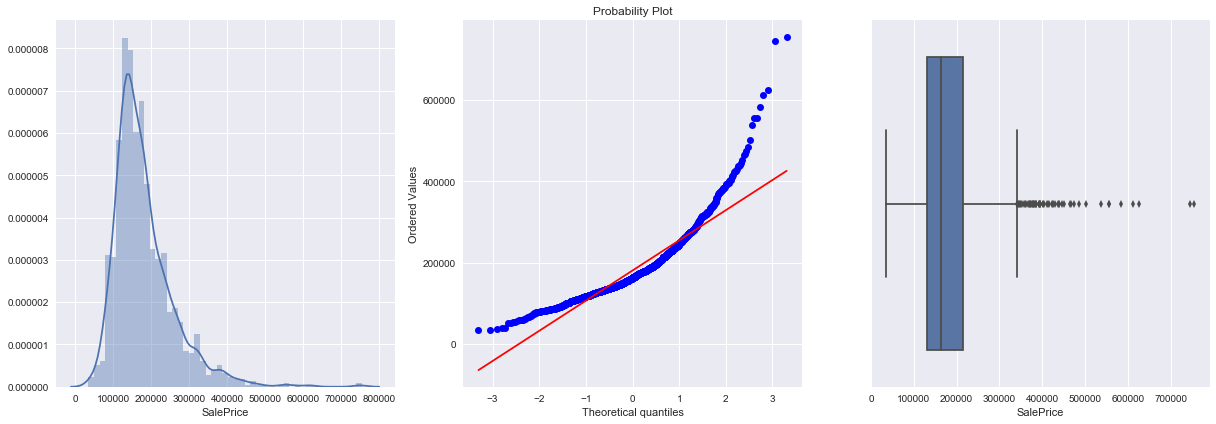

In [8]:
plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(train["SalePrice"])

plt.subplot(132)
stats.probplot(train["SalePrice"], plot=plt)

plt.subplot(133)
sns.boxplot(train["SalePrice"])
plt.tight_layout()
plt.show()

### 1-3  Analysis the univariance

In [9]:
# train = train.iloc[:,1:] #Id열 제거
train["MSSubClass"] = train["MSSubClass"].astype('str')   

In [10]:
# Categoric and Numerical 변수 분리
numerical_features = []
categorical_features = []
for f in train.columns:
    if train.dtypes[f] != 'object':
        numerical_features.append(f)
    else:
        categorical_features.append(f)

In [11]:
print("Numerical Features Qty :", len(numerical_features),"\n")
print("Numerical Features : ", numerical_features, "\n\n")
print("Categorical Features Qty :", len(categorical_features),"\n")
print("Categorical Features :", categorical_features)

Numerical Features Qty : 37 

Numerical Features :  ['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 


Categorical Features Qty : 44 

Categorical Features : ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC

#### Numerical Features with SalePrice

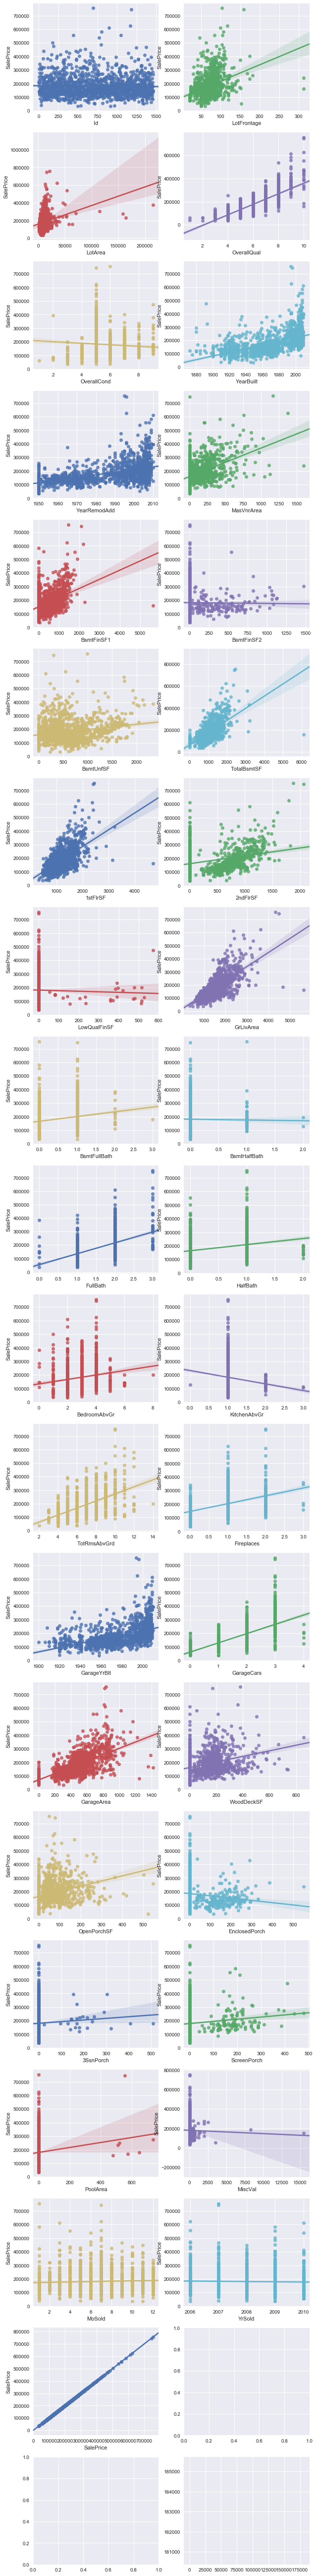

In [12]:
fig, ax = plt.subplots(20,2, figsize = (10,95))

for idx, n in enumerate(numerical_features):
    
    if idx % 2 == 0 :
        sns.regplot(x=n, y="SalePrice",data=train, ax = ax[idx//2,0])
    
        
    else:
        sns.regplot(x=n, y="SalePrice",data=train, ax = ax[idx//2,1])

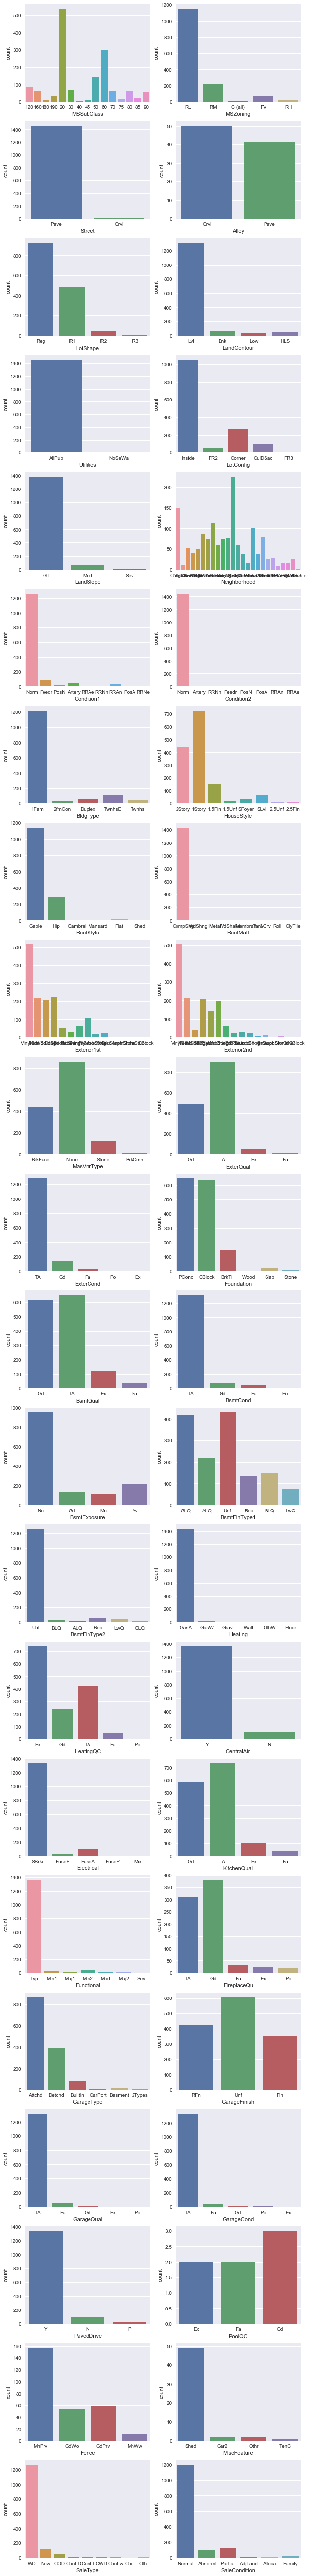

In [13]:
fig, ax = plt.subplots(22,2, figsize = (10,95))

for idx, n in enumerate(categorical_features):
    
    if idx % 2 == 0 :
        sns.countplot(x=n,data=train, ax = ax[idx//2,0])
  
    else:
        sns.countplot(x=n,data=train, ax = ax[idx//2,1])

## 2. Feature Engineering

### 2-1 SalePrice와 변수들 간의 관계

#### 2-1-1 GrLivArea  &  2ndFloor & Basement

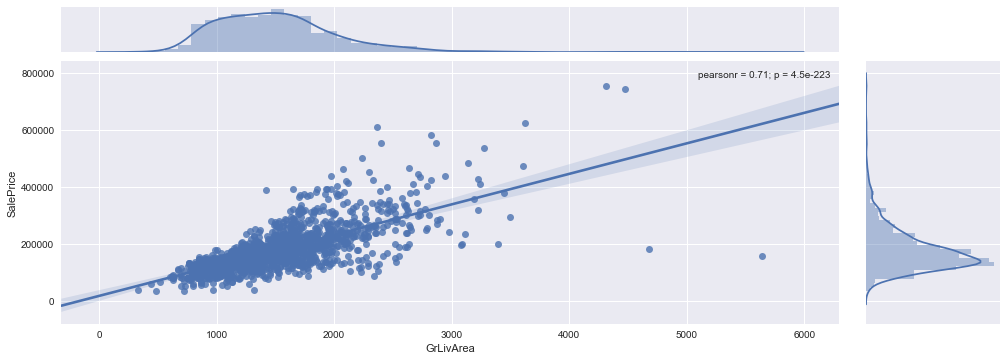

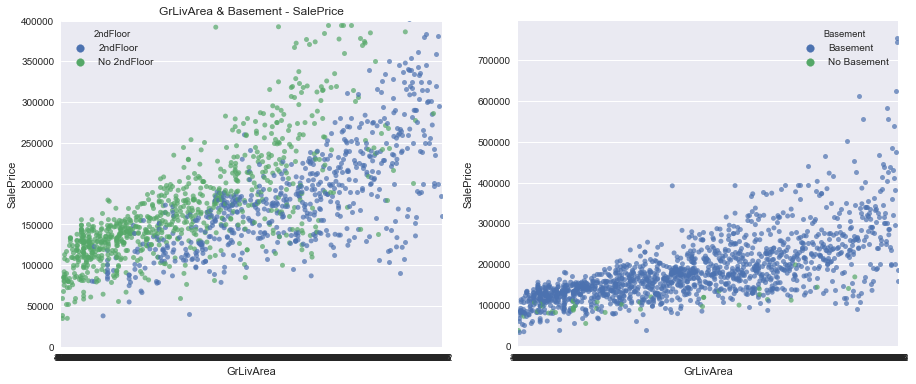

In [14]:
grid = sns.jointplot(x = "GrLivArea", y = "SalePrice", data=train, kind="reg")
grid.fig.set_size_inches(15,5)

df_train = train.copy()
df_train["2ndFloor"] = "2ndFloor"
df_train["2ndFloor"].loc[df_train["2ndFlrSF"]==0] = "No 2ndFloor"
df_train["Basement"] = "Basement"
df_train["Basement"].loc[df_train["TotalBsmtSF"]==0] = "No Basement"

plt.figure(figsize = (15,6))

plt.subplot(121)
g = sns.stripplot( x = "GrLivArea", y = 'SalePrice', hue = "2ndFloor", data = df_train, alpha = 0.7)
g.set_xlabel('GrLivArea')
g.set_ylabel('SalePrice')
g.set_ylim(0,400000)
g.set_title('GrLiv & 2ndFloor - SalePrice')

plt.subplot(122)
b = sns.stripplot( x = "GrLivArea", y = 'SalePrice', hue = "Basement", data = df_train, alpha = 0.7)
b.set_xlabel('GrLivArea')
b.set_ylabel('SalePrice')
g.set_ylim(0,400000)
g.set_title('GrLivArea & Basement - SalePrice')

plt.show()

In [15]:
GrLivArea_outlier = detect_outliers(train, "GrLivArea")
GrLivArea_outlier

[Int64Index([  58,  118,  185,  197,  231,  304,  324,  496,  523,  583,  608,
              635,  691,  769,  798,  803,  961, 1024, 1031, 1046, 1142, 1169,
             1173, 1175, 1182, 1268, 1298, 1312, 1328, 1353, 1386],
            dtype='int64')]

Find : 1. Grliv 넓이가 중간 아래부분까지는 같은 넓이의 집은 2층보다 1층집의 값 더 비싼것을 알수 있었다
       2. 베이스먼트가 없는집은 거의 없으며, 집값에는 영향이 없는것 같다 

#### 2-1-2 OverallQual & OverallCond

Text(0.5,1,'OverallCond - SalePrice')

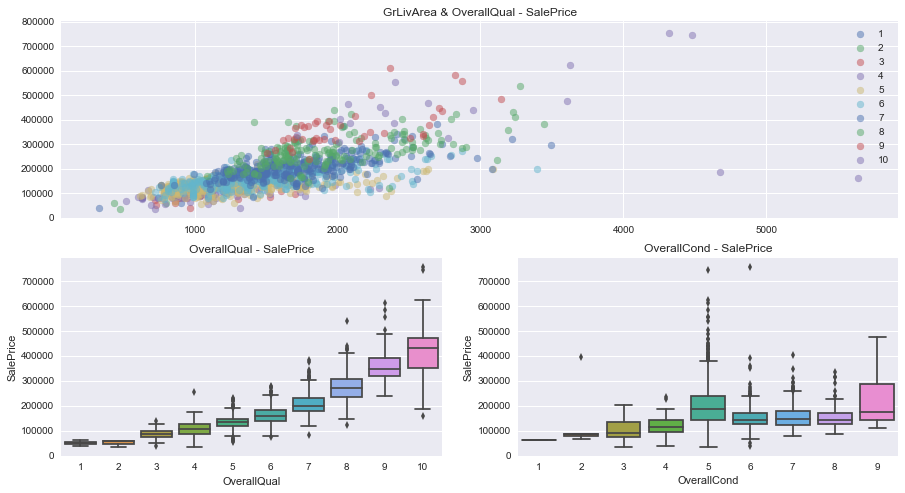

In [16]:
plt.figure(figsize=(15,8))

ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
for qual in range(1,10+1):
    index = train.OverallQual == qual
    ax1.scatter(train.GrLivArea.loc[index], train.SalePrice.loc[index], data=train, label= qual, alpha =0.5)
ax1.legend(loc = 0)
ax1.set_title("GrLivArea & OverallQual - SalePrice")

ax2 = plt.subplot2grid((2,2), (1,0))
sns.boxplot(x = "OverallQual", y = "SalePrice", data=train, ax= ax2)
ax2.set_title('OverallQual - SalePrice')

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = "OverallCond", y = "SalePrice", data=train, ax= ax3)
ax3.set_title('OverallCond - SalePrice')

In [17]:
OverallQual_outlier = detect_outliers(train, "OverallQual")
OverallQual_outlier

[Int64Index([375, 533], dtype='int64')]

Find : 1. 품질과 집값은 선형관계를 발견할 수 있으나 overall condition과 집값은 관계가 없는것을 발견할 수 있었음

#### 2-1-2 GarageArea & GarageCars

No handles with labels found to put in legend.


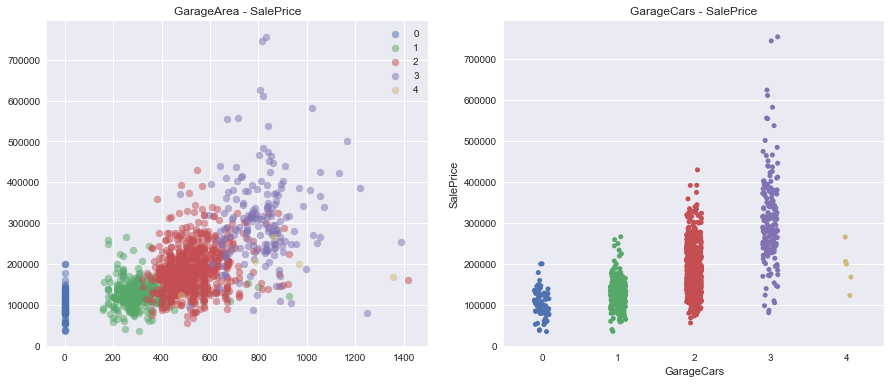

In [18]:
plt.figure(figsize=(15,6))

ax1 = plt.subplot(1,2,1)
for car in range(0,5):
    index = train.GarageCars == car
    ax1.scatter(x = train.GarageArea.loc[index], y = train.SalePrice.loc[index], data=train, label=car, alpha='0.5')

ax1.legend()
ax1.set_title('GarageArea - SalePrice')

ax2 = plt.subplot(1,2,2)
sns.stripplot(x = "GarageCars", y = "SalePrice", data=train,ax=ax2, jitter=True)
ax2.set_title('GarageCars - SalePrice')
ax2.legend()

plt.show()

In [19]:
GarageCars_outlier = detect_outliers(train, "GarageArea")
GarageCars_outlier

[Int64Index([ 178,  224,  270,  317,  408,  581,  664,  718,  803,  825, 1061,
             1087, 1142, 1184, 1190, 1228, 1241, 1268, 1298, 1350, 1417],
            dtype='int64')]

#### 2-1-3 Neighborhood

In [20]:
Neighbor = train.pivot_table(index="Neighborhood",values="SalePrice", aggfunc='mean').sort_values(by = ["SalePrice"], ascending = False)
Neighbor = Neighbor.reset_index()

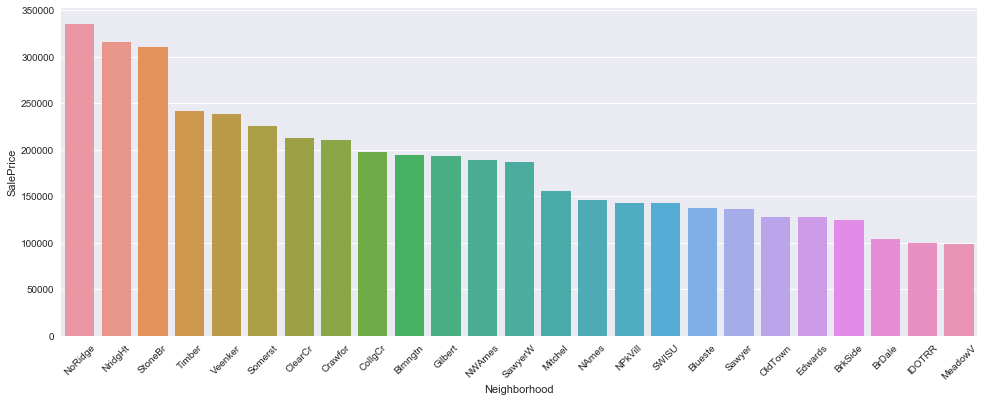

In [21]:
g = sns.factorplot(x = "Neighborhood", y="SalePrice", data=Neighbor, size =8, kind="bar")
g.set_xticklabels(rotation=45)
g.fig.set_size_inches(15,5)
plt.show()

In [22]:
Neighbor_list=list(set(Neighbor["Neighborhood"]))

In [23]:
High_price_neighbor = ['NoRidge','NridgHt','StoneBr']
Middle_price_neighbor = ['Timber','Somerst','Veenker','ClearCr','Crawfor','NWAmes', 'Gilbert','Blmngtn', 'SWISU','Mitchel','CollgCr']
Low_price_neighbor = ['IDOTRR','Blueste', 'Sawyer','NAmes', 'BrDale', 'OldTown','MeadowV', 'NPkVill','BrkSide','Edwards']

In [ ]:
# def Gp_Neighbor(saleprice):
#     if saleprice > 250000:
#         return "first_group"
#     elif saleprice > 200000:
#         return "second_group"
#     elif saleprice > 150000:
#         return "third_group"
#     else: 
#         return "fourth_group"

In [ ]:
# for n in Neighbor_list:
#     if n in High_price_neighbor:
#         High_price.append(n)
#     train[train["Neighborhood"] == n

# High_price_neighbor = train[train["Neighborhood"] == 'NoRidge','NridgHt','StoneBr'

In [ ]:
# df_train = train.copy()
# df_train["Gp_Neighborhood"] = train["SalePrice"].apply(Gp_Neighborhood)
# g = sns.factorplot(x="Gp_Neighborhood", y="SalePrice", data=train, kind="bar")
# g.fig.set_size_inches(15,5)
# plt.show()

#### 2-1-4 YearBuilt

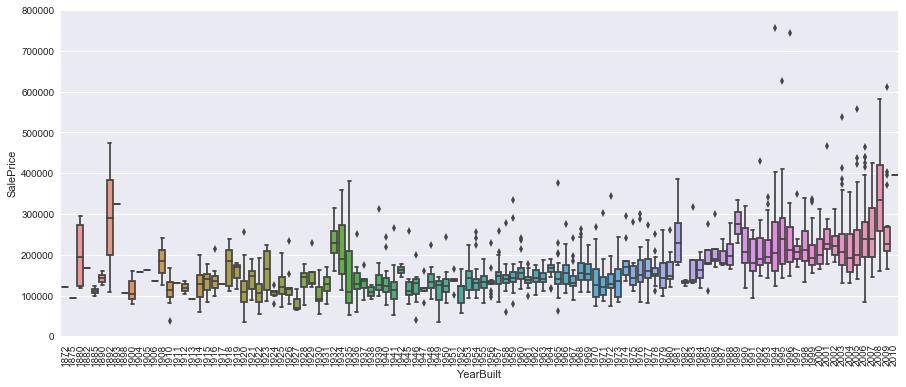

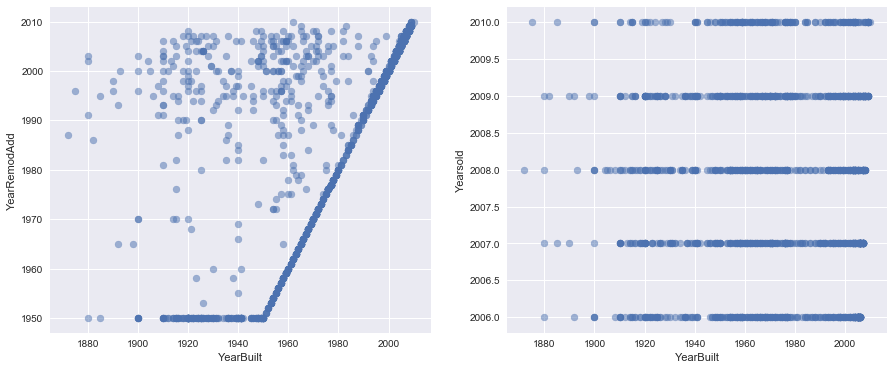

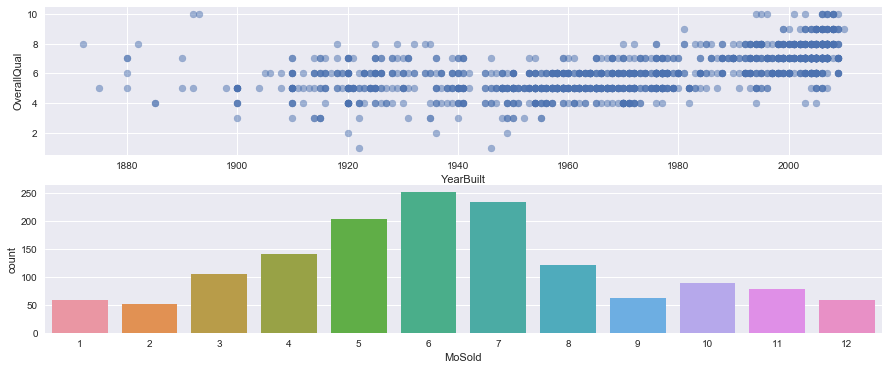

In [24]:
plt.figure(figsize=(15,6))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15,6))
ax2 = plt.subplot(1,2,1)
ax2.scatter(x = train['YearBuilt'], y = train['YearRemodAdd'], alpha = 0.5)
plt.xlabel('YearBuilt')
plt.ylabel('YearRemodAdd')
ax3 = plt.subplot(1,2,2)
ax3.scatter(x = train['YearBuilt'], y = train['YrSold'], alpha = 0.5)
plt.xlabel('YearBuilt')
plt.ylabel('Yearsold')
plt.show()

plt.figure(figsize=(15,6))
ax4 = plt.subplot2grid((2,2), (0,0), colspan = 2)
ax4.scatter(x = train['YearBuilt'], y = train['OverallQual'], alpha = 0.5)
plt.xlabel('YearBuilt')
plt.ylabel('OverallQual')
ax5 = plt.subplot2grid((2,2), (1,0), colspan = 2)
sns.countplot(x = "MoSold", data=train, ax = ax5)
plt.show()

Find

1. 1950년대 이후로 지어진 집부터는 대체로 최근에 지어진 집의 가격이 높음을 알 수 있음.
2. 아직 리모델링이 되지 않은 집은 지어진 년도와 같은 년도로 기록되어 있음.
3. 리모델링은 1950년도 이후에 시행되었으며 오래된 집들은 대부분 1950년도에 리모델링 되었다고 기록되어 있음.
4. 매매년도는 2006년부터 2010년까지의 기록으로 되어있으며, 매매가 가장 많았던 년도는 2009년임.
5. OverallQual이 8-10인 집은 대체로 1980년도 이후에 지어진 집임.
6. 날이 따뜻한 5, 6, 7월에 가장 매매가 활발하게 이루어짐.

#### 2-1-5 Fireplaces & FireplaceQu

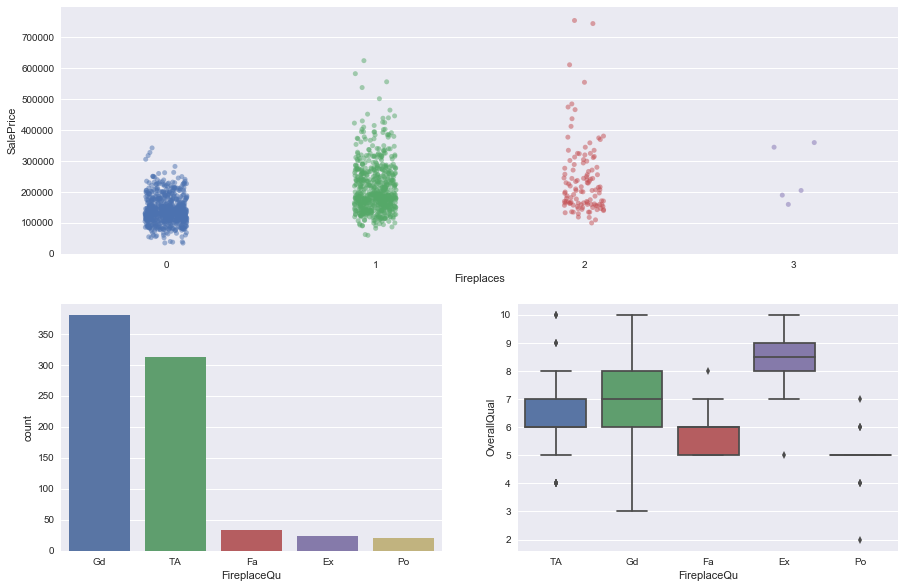

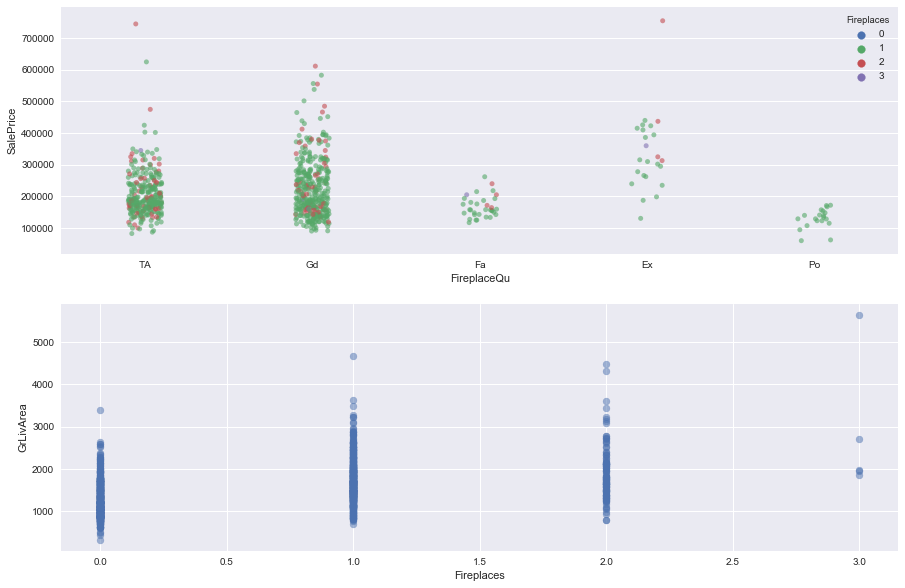

In [25]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
sns.stripplot(x = train['Fireplaces'], y = train['SalePrice'], alpha = 0.5, jitter = True, ax=ax1)

ax2 = plt.subplot2grid((2,2), (1,0))
sns.countplot(x = "FireplaceQu", data=train, ax = ax2, order = train["FireplaceQu"].value_counts().index)

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = 'FireplaceQu', y = 'OverallQual', data = train, ax=ax3)
plt.show()

plt.figure(figsize=(15,10))
ax4 = plt.subplot(2,1,1)
sns.stripplot(x='FireplaceQu', y='SalePrice', hue='Fireplaces', data=train, jitter=True, alpha=0.6, ax=ax4)

ax5 = plt.subplot(2,1,2)
ax5.scatter(x = train['Fireplaces'], y = train['GrLivArea'], alpha = 0.5)
plt.xlabel('Fireplaces')
plt.ylabel('GrLivArea')
plt.show()


Find

1. FirePlaces가 0개인 집과 1개인 집의 가격 차이가 있음을 볼 수 있음.
2. FireplaceQu와 OverallQual은 밀접한 관계가 있음.
3. FireplaceQu는 SalePrice에 많은 영향을 미친다고 볼 수는 없음.
4. 같은 GrLivArea임에도 Fireplaces의 갯수는 차이가 있음.

#### 2-1-6 BsmtBath

BsmtFullBath : 지하실 가득한 욕실  
BsmtHalfBath : 지하 욕실 반 화장실

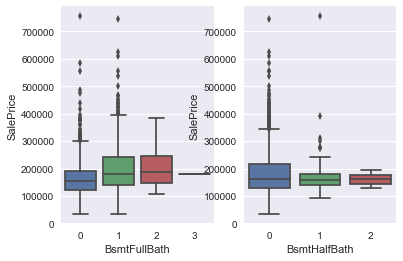

In [26]:
plt.subplot(121)
sns.boxplot(x = "BsmtFullBath", y = "SalePrice", data=train)

plt.subplot(122)
sns.boxplot(x = "BsmtHalfBath", y = "SalePrice", data=train)

In [25]:
# test = np.log1p(train.BsmtFullBath)
# stats.probplot(test, plot=plt)
# stats.probplot(train["BsmtFullBath"], plot=plt)
# stats.probplot(train["BsmtHalfBath"], plot=plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]), array([0, 0, 0, ..., 2, 2, 3])),
 (0.42173550803653326, 0.4253424657534247, 0.8113909972300496))

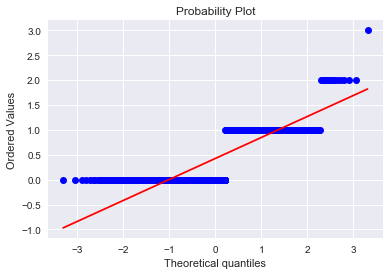

In [27]:
stats.probplot(train["BsmtFullBath"], plot=plt)

Full Bath의 경우에는 영향이 있으나 HalfBath의 경우에는 영향이 미미한것으로 확인할 수 있음

#### 2-1-7 TotRm and Bedroom

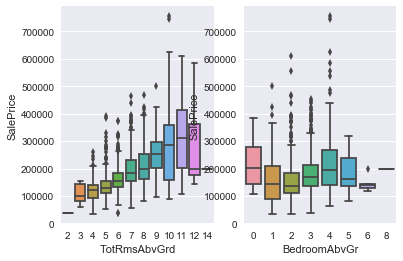

In [28]:
plt.subplot(121)
sns.boxplot(x = "TotRmsAbvGrd", y = "SalePrice", data=train)

plt.subplot(122)
sns.boxplot(x = "BedroomAbvGr", y = "SalePrice", data=train)

확실히 TotRmsAbvGrd 는 연관관계가 있는것으로 보임

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]), array([0, 0, 0, ..., 6, 6, 8])),
 (0.7527029527137685, 2.8664383561643834, 0.9211580913546914))

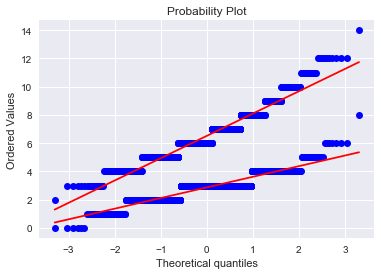

In [29]:
stats.probplot(train["TotRmsAbvGrd"], plot=plt)
stats.probplot(train["BedroomAbvGr"], plot=plt)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12067fcf8>,
      dtype=object)

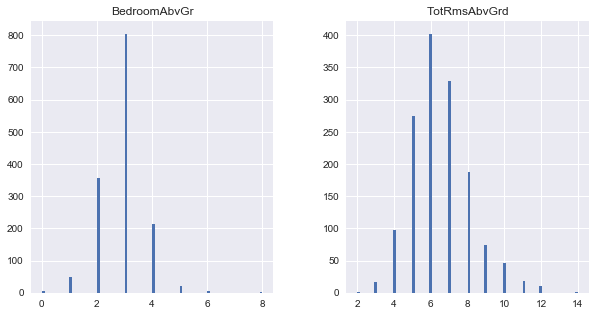

In [30]:
train[['TotRmsAbvGrd', 'BedroomAbvGr']].hist(bins=80, figsize=(10,5))

Tot : 길게 하나 하고, 어떤 방이 여기에 포함되어있는지 확인필요

이런 데이터의 경우에는 확실히 한단계 데이터 조치가 필요할것으로 보임
이런 경우는 어떻게 해야하지?

Full Bath의 경우에는 영향이 있으나 HalfBath의 경우에는 영향이 미미한것으로 확인할 수 있음

### 2-2 Missing Data 처리

In [31]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("All data size is {}".format(all_data.shape))

All data size is (2919, 80)


In [32]:
total = all_data.isnull().sum().sort_values(ascending=False)[:30]
ratio = ((all_data.isnull().sum()/len(all_data))*100).sort_values(ascending=False)[:30]
missing_data = pd.concat([total, ratio], axis=1, keys=['Total', 'Ratio'])
missing_data[:20]

,Total,Ratio
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageQual,159,5.447071
GarageFinish,159,5.447071
GarageYrBlt,159,5.447071
GarageCond,159,5.447071


Text(0.5,1,'Percent missing data by features')

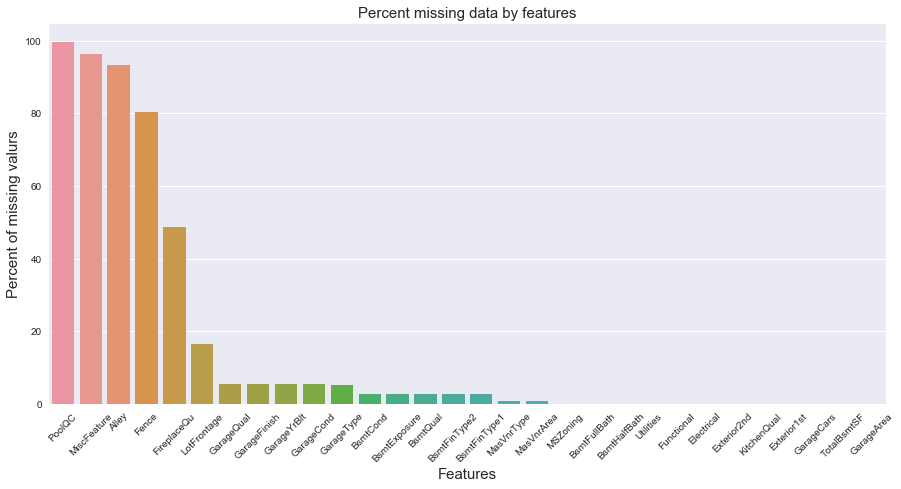

In [33]:
f, ax = plt.subplots(figsize=(15,7))
plt.xticks(rotation='45')
sns.barplot(x=ratio.index, y=ratio)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing valurs', fontsize=15)
plt.title('Percent missing data by features', fontsize=15)

In [34]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [35]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data['MSZoning']= all_data["MSZoning"].fillna(all_data['MSZoning'].mode()[0])

all_data = all_data.drop('Utilities', axis=1)

all_data['Functional']= all_data["Functional"].fillna("Typ")

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
all_data["Electrical"] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data["KitchenQual"]=all_data["KitchenQual"].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

### 2-3 아웃라이어 제거

In [36]:
y_train

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [37]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [38]:
x_train_x0 = train.copy()

In [39]:
x_train = sm.add_constant(x_train_x0)
x_train = pd.get_dummies(x_train)

In [40]:
x_train.tail()

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave
1455,1.0,953,694,0,3,0.0,0.0,0.0,0.0,953.0,...,0,0,0,0,0,0,0,1,0,1
1456,1.0,2073,0,0,3,790.0,163.0,1.0,0.0,589.0,...,0,0,0,0,0,0,0,1,0,1
1457,1.0,1188,1152,0,4,275.0,0.0,0.0,0.0,877.0,...,0,0,0,0,0,0,0,1,0,1
1458,1.0,1078,0,0,2,49.0,1029.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
1459,1.0,1256,0,0,3,830.0,290.0,1.0,0.0,136.0,...,0,0,0,0,0,0,0,1,0,1


In [41]:
x_train = pd.DataFrame(x_train.astype(float))
y_train = pd.DataFrame(y_train.astype(float))

x_train = np.array(x_train)
y_train = np.array(y_train)

In [42]:
model = sm.OLS(pd.DataFrame(y_train),pd.DataFrame(x_train))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     63.82
Date:                Tue, 06 Mar 2018   Prob (F-statistic):               0.00
Time:                        11:50:17   Log-Likelihood:                -16565.
No. Observations:                1460   AIC:                         3.366e+04
Df Residuals:                    1196   BIC:                         3.505e+04
Df Model:                         263                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0          -2.124e+04   1.11e+05     -0.192      0.8

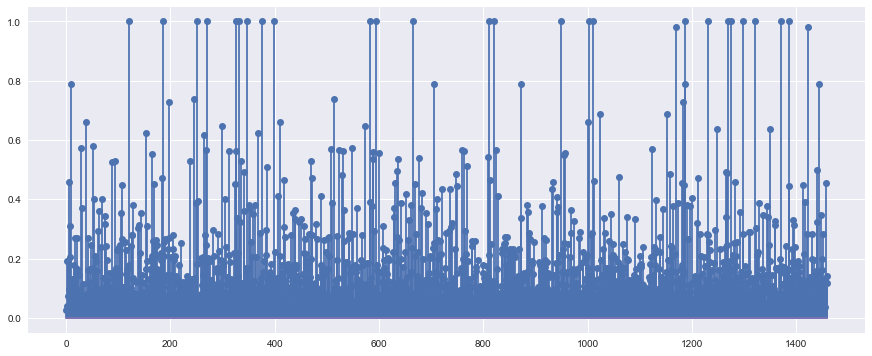

In [43]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(15,6))
plt.stem(hat)
plt.show()

In [44]:
hat.sum()

263.99999999998937

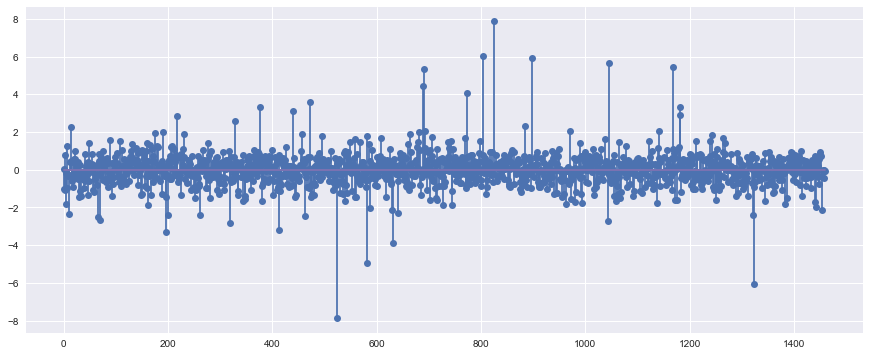

In [45]:
plt.figure(figsize=(15, 6))
plt.stem(result.resid_pearson)
plt.show()

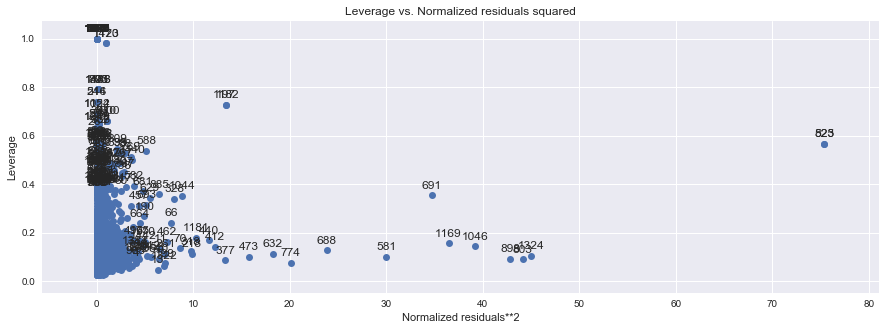

In [46]:
g = sm.graphics.plot_leverage_resid2(result)
g.set_size_inches(15,5)
plt.show()

In [53]:
o_x_train = x_train[result.resid_pearson > 2]
print(len(o_x_train))
idx = np.where(result.resid_pearson > 2)[0]
print(idx)
f_x_train = x_train[result.resid_pearson < 2]
print(len(f_x_train))

21
[  13  190  218  328  377  440  473  688  691  693  774  803  825  885
  898  970 1046 1142 1169 1181 1182]
1439


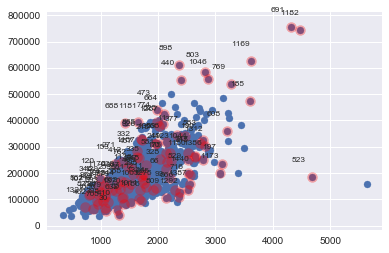

[   9   11   30   66   70   88   93  107  120  129  153  175  185  190
  197  218  237  249  253  271  298  318  326  328  332  335  346  367
  377  398  410  412  440  457  462  469  473  479  523  529  568  574
  581  582  583  588  608  629  632  662  664  666  681  688  691  693
  705  716  736  747  762  769  774  803  809  821  825  873  885  898
  944  948  954  955  970 1000 1003 1011 1044 1046 1138 1169 1170 1173
 1180 1181 1182 1186 1187 1211 1267 1275 1292 1312 1321 1324 1359 1370
 1386 1387 1423 1440 1443]


In [94]:
from statsmodels.graphics import utils

cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y_train) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(x_train_x0['GrLivArea'], y_train)
plt.scatter(x_train_x0['GrLivArea'][idx], y_train[idx], s=100, c="r", alpha=0.3)
utils.annotate_axes(range(len(idx)), idx, 
                    list(zip(x_train_x0['GrLivArea'][idx], y_train[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.show()

print(idx)

#Cook's distance 어떻게 활용할지?

In [74]:
resid_outliers = [13, 190, 218, 328, 377, 440, 473, 688, 691, 693, 774, 803, 825, 885, 898, 970, 1046, 1142, 1169, 1181, 1182]
GrLivArea_outliers = [58,  118,  185,  197,  231,  304,  324,  496,  523,  583,  608,
             635,  691,  769,  798,  803,  961, 1024, 1031, 1046, 1142, 1169,
            1173, 1175, 1182, 1268, 1298, 1312, 1328, 1353, 1386]
OverallQual_outliers = [375, 533]
GarageCars_outliers = [178,  224,  270,  317,  408,  581,  664,  718,  803,  825, 1061,
            1087, 1142, 1184, 1190, 1228, 1241, 1268, 1298, 1350, 1417]

# x_train_x0.drop[resid_outliers, axis='rows']
# y_train.drop[resid_outliers, axis='rows']

### Encoding

In [92]:
train = pd.read_csv("train.csv")
train_d = pd.get_dummies(train)

corrmat = train_d.corr()
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,-0.051807,0.128311,-0.023466,-0.094298,-0.023965,-0.037030,-0.019817,0.016684,-0.076258,0.126571
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.019779,-0.156175,-0.050663,0.163684,-0.046367,-0.038888,-0.033444,-0.023873,0.161642,-0.151659
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,-0.023431,0.346954,0.012122,-0.238463,-0.110233,-0.045601,-0.010104,-0.035785,-0.158427,0.343895
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,-0.039952,0.325647,-0.011431,-0.182733,-0.135942,-0.040294,-0.020727,-0.048056,-0.120577,0.322837
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,-0.022891,0.171125,-0.026065,-0.131484,-0.044767,-0.011959,-0.010116,-0.009915,-0.084801,0.167483
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,-0.017825,0.044883,0.010652,-0.024778,-0.024832,-0.014874,0.021369,0.000765,-0.019560,0.044912


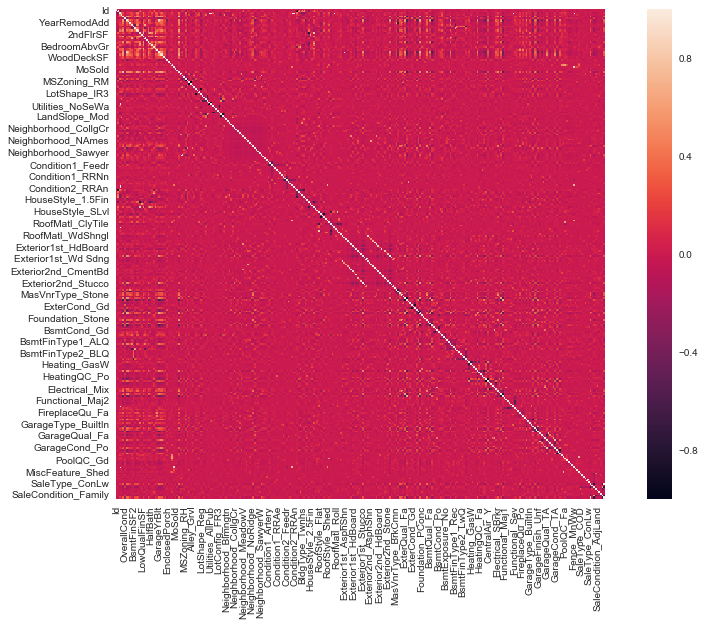

In [93]:
f, ax = plt.subplots(figsize = (15,9))
sns.heatmap(corrmat, vmax = 1, square=True)

In [103]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd'],
      dtype='object')

In [104]:
cm = np.corrcoef(train_d[cols].values.T)
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.55310485, 0.53372316],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.47077958, 0.42745234],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.30996196, 0.82548937],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.35642494, 0.36228857],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.37022284, 0.33782212],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.40316608, 0.28557256],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.37738677, 0.40951598],
       [0.56066376, 0.55059971, 0.6300116

[]

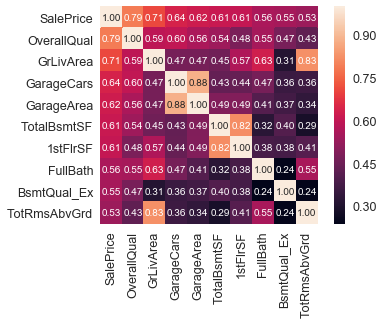

In [105]:
sns.set(font_scale=1.25)
hm=sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',\
              annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.plot()

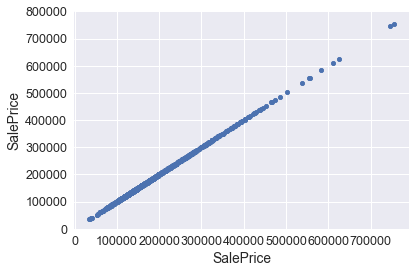

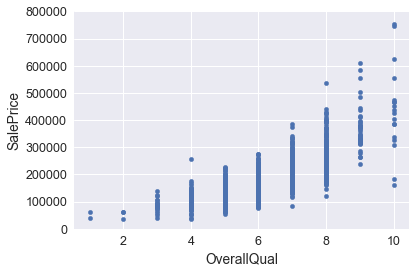

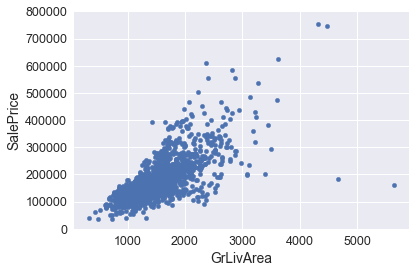

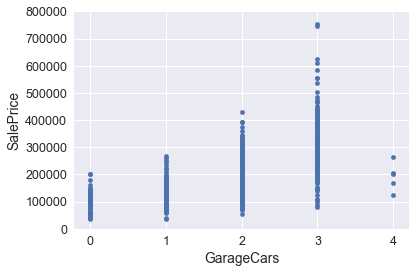

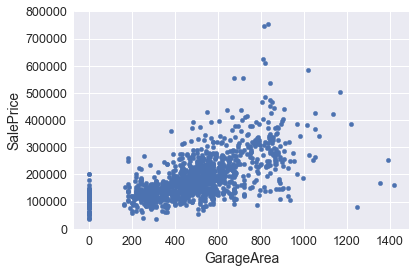

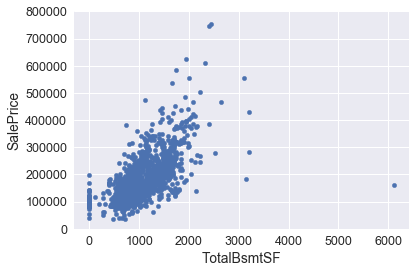

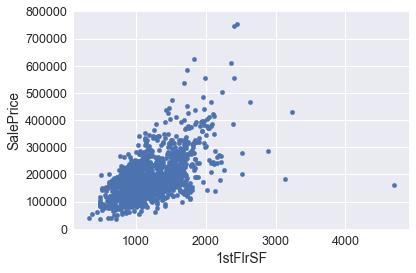

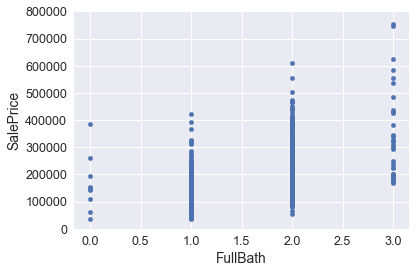

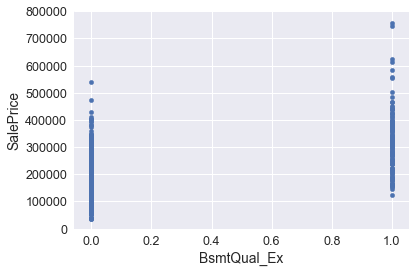

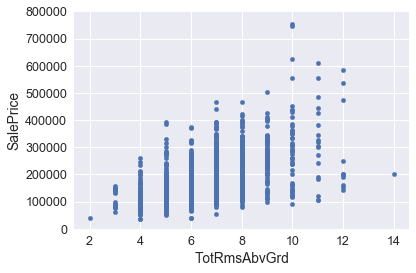

In [107]:
for c in cols:
    data = pd.concat([train_d['SalePrice'], train_d[c]],axis=1)
    data.plot.scatter(x=c, y='SalePrice',ylim=(0,800000));

In [ ]:
# def encode(frame, feature):
#     ordering = pd.DataFrame()
#     ordering['val'] = frame[feature].unique()
#     ordering.index = ordering.val
#     ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
#     ordering = ordering.sort_values('spmean')
#     ordering['ordering'] = range(1, ordering.shape[0]+1)
#     ordering = ordering['ordering'].to_dict()
    
#     for cat, o in ordering.items():
#         frame.loc[frame[feature] == cat, feature+'_E'] = o
    
# categoric_encoded = []
# for q in categoric_features:  
#     encode(train, q)
#     categoric_encoded.append(q+'_E')
# print(categoric_encoded)

In [ ]:
# import missingno as msno

# missingValueColumns = train.columns[train.isnull().any()].tolist()
# msno.heatmap(train[missingValueColumns],figsize=(20,20))

In [ ]:
# all_data[(all_data['GarageCars']==4) & (all_data['SalePrice'] < 300000)]

In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [ ]:
from scipy import stats
from scipy.stats import norm, skew

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(30)

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])